In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as soup
import re 
import pandas as pd 
import time  
import matplotlib.pyplot as plt

In [2]:
cd 'D:\portafolio\Web_scraping_Facebook_departamentos_alquiler_Lima'

[WinError 123] El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos: "'D:\\portafolio\\Web_scraping_Facebook_departamentos_alquiler_Lima'"
d:\portafolio\Web_scraping_Facebook_departamentos_alquiler_Lima


In [3]:
browser=Browser('chrome')
#Url básico
base_url= "https://www.facebook.com/marketplace/lima/search?"
#Definimos los parámetros que nos interesan
min_price=400
max_price=3000
days_listed=30
query="alquiler"

In [4]:
#Visitamos la página
url=f"{base_url}minPrice={min_price}&maxPrice={max_price}&daysSinceListed={days_listed}&query={query}%20departamentos&exact=false"
browser.visit(url)

In [5]:
#Definimos el numero de scolls para cargar más resultados 
scroll_count=20
scroll_delay=2

for _ in range(scroll_count):
    browser.execute_script('window.scrollTo(0, document.body.scrollHeight);')

    time.sleep(scroll_delay)

In [6]:
#Parse HTML
html=browser.html 
#Creamos un objeto BeautifulSoup desde el HTML scrapeado
market_soup=soup(html, 'html.parser')

In [7]:
#Finalizar la sesión de navegación automatizada
browser.quit()

In [8]:
#Extraemos toda la información necesaria y las colocamos en listas 
#Título 
titles_div=market_soup.find_all('span', class_='x1lliihq x6ikm8r x10wlt62 x1n2onr6')
titles_list= [title.text.strip() for title in titles_div]
#Precio
precio_div=market_soup.find_all('span', class_='x193iq5w xeuugli x13faqbe x1vvkbs x1xmvt09 x1lliihq x1s928wv xhkezso x1gmr53x x1cpjm7i x1fgarty x1943h6x xudqn12 x676frb x1lkfr7t x1lbecb7 x1s688f xzsf02u')
precio_list= [precio.text.strip() for precio in precio_div]
#Lugar
place_div=market_soup.find_all('span', class_='x1lliihq x6ikm8r x10wlt62 x1n2onr6 xlyipyv xuxw1ft x1j85h84')
place_list= [place.text.strip() for place in place_div]
#URL
urls_div=market_soup.find_all('a', class_='x1i10hfl xjbqb8w x6umtig x1b1mbwd xaqea5y xav7gou x9f619 x1ypdohk xt0psk2 xe8uvvx xdj266r x11i5rnm xat24cr x1mh8g0r xexx8yu x4uap5 x18d9i69 xkhd6sd x16tdsg8 x1hl2dhg xggy1nq x1a2a7pz x1heor9g x1lku1pv')
urls_list=[url.get('href') for url in urls_div]

In [9]:
#Agregamos todos lols valores a una lista de diccionarios 
departamentos_alquiler=[]

for i, item in enumerate(place_list):
    dep_dict={}
    dep_dict['Publicación']=titles_list[i]
    #Separo el distrito de la provincia
    place_split=place_list[i].split(',')
    dep_dict['Provincia']=place_split[1]
    dep_dict['Distrito']=place_split[0]
    #Quito el (S/)
    dep_dict['Precio']=int(re.sub(r'[^\d.]', '', precio_list[i]))
    #Agrego el URL 
    dep_dict['URL']=urls_list[i]
    departamentos_alquiler.append(dep_dict)

In [10]:
departamentos_alquiler=pd.DataFrame(departamentos_alquiler)
print(departamentos_alquiler.shape)
departamentos_alquiler.head()

(25, 5)


,Publicación,Provincia,Distrito,Precio,URL
0,Alquiler habitación con baño y cocina 4to piso...,Lima,Breña,550,/marketplace/item/661097059344441/?ref=search&...
1,Alquiler de Departamento Zona Centrica,Lima,Lima,1600,/marketplace/item/1669418246870492/?ref=search...
2,Alquiler departamento La calera Surquillo,Lima,Surquillo,1900,/marketplace/item/6787179298024742/?ref=search...
3,"Alquiler Mini departamento en Pueblo Libre, lí...",Lima,Pueblo Libre,1200,/marketplace/item/1732663153882283/?ref=search...
4,!!!...ALQUILER DEPARTAMENTO EN EL RÍMAC...!!!,Lima,Rimac,999,/marketplace/item/1287276458432780/?ref=search...


In [11]:
departamentos_alquiler['URL']='https://www.facebook.com' + departamentos_alquiler['URL'] 

In [12]:
departamentos_alquiler.head()

,Publicación,Provincia,Distrito,Precio,URL
0,Alquiler habitación con baño y cocina 4to piso...,Lima,Breña,550,https://www.facebook.com/marketplace/item/6610...
1,Alquiler de Departamento Zona Centrica,Lima,Lima,1600,https://www.facebook.com/marketplace/item/1669...
2,Alquiler departamento La calera Surquillo,Lima,Surquillo,1900,https://www.facebook.com/marketplace/item/6787...
3,"Alquiler Mini departamento en Pueblo Libre, lí...",Lima,Pueblo Libre,1200,https://www.facebook.com/marketplace/item/1732...
4,!!!...ALQUILER DEPARTAMENTO EN EL RÍMAC...!!!,Lima,Rimac,999,https://www.facebook.com/marketplace/item/1287...


In [13]:
prices=departamentos_alquiler.groupby('Distrito')['Precio'].mean().sort_values()

In [14]:
prices

Distrito
Breña                       675.000000
Villa María del Triunfo     750.000000
San Juan de Lurigancho      833.333333
Rimac                       999.000000
Santa Anita                1150.000000
Santiago de Surco          1300.000000
La Victoria                1312.500000
El Agustino                1350.000000
Pueblo Libre               1400.000000
Lima                       1600.000000
Surquillo                  1833.333333
San Miguel                 1850.000000
San Luis                   2000.000000
Lince                      2399.000000
Name: Precio, dtype: float64

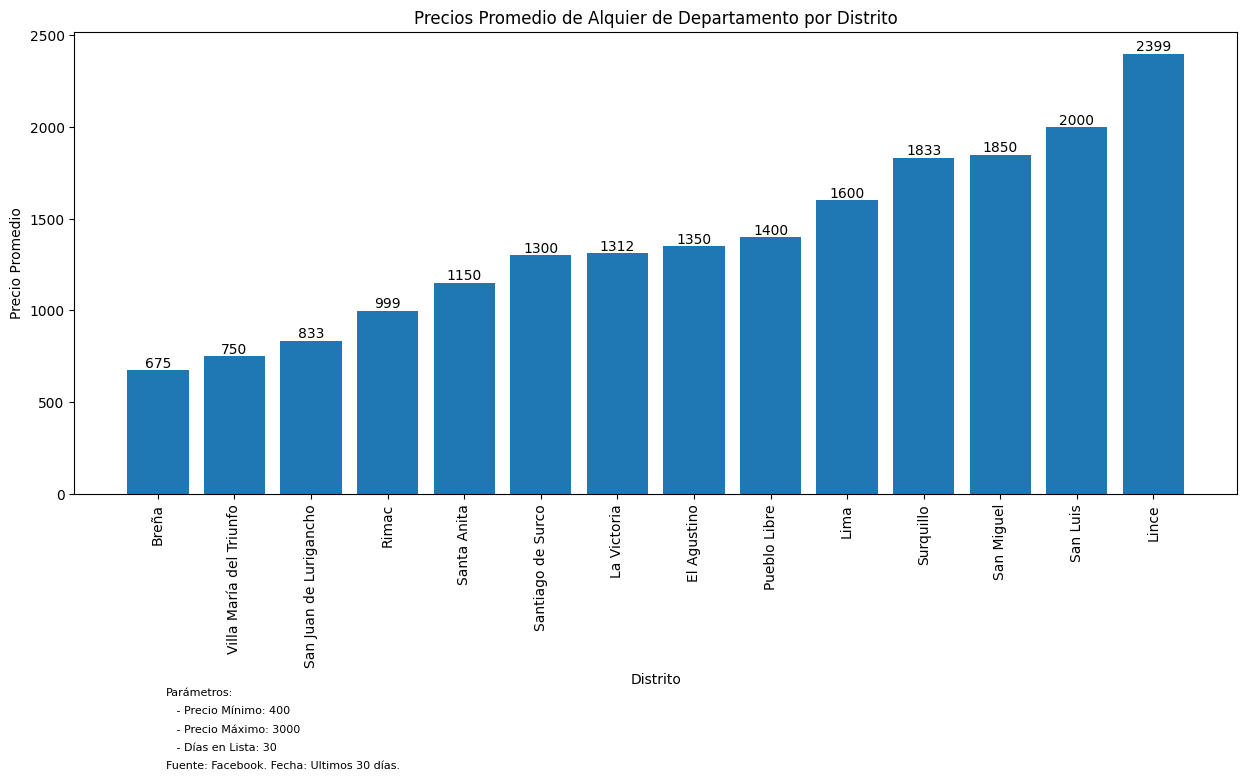

In [31]:

plt.figure(figsize=(15, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.bar(prices.index, prices.values)
# Agregar los valores encima de cada barra
for i, v in enumerate(prices.values):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x si son largas
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio')
plt.title('Precios Promedio de Alquier de Departamento por Distrito')
plt.text(0.1, -1500, 'Fuente: Facebook. Fecha: Ultimos 30 días.', fontsize=8, color='Black')
plt.text(0.1, -1100, 'Parámetros:', fontsize=8, color='Black')
plt.text(0.1, -1200, f'   - Precio Mínimo: {min_price}', fontsize=8, color='Black')
plt.text(0.1, -1300, f'   - Precio Máximo: {max_price}', fontsize=8, color='Black')
plt.text(0.1, -1400, f'   - Días en Lista: {days_listed}', fontsize=8, color='Black')
plt.savefig('outputs\graph_bar.png')
plt.show()



In [16]:
departamentos_alquiler.to_excel('outputs\departamentos_alquiler.xlsx',  index=False)